In [37]:
%load_ext autoreload
%autoreload 2
from requests import get
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, ttest_rel

def get_best(models, json_data, questions):
    return max(models, key=lambda key: np.mean(json_data[key][questions - 1]) if len(json_data[key]) == n_questions and key not in sota_models else 0)

plt.rcParams['axes.linewidth'] = 0.8
print(plt.style.available)
plt.style.use('seaborn-deep')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [38]:
metric = 'ser'
cutoff = '10'
sota_models = ['lrmf', 'fmf', 'melu']
sota_comparison = False
ignore_models = ['random']
n_questions = 10

data = get(f'https://mindreader.tech/spectate/results/equal/{metric}/{cutoff}').json()
#data = get(f'http://localhost:5000/spectate/results/equal/{metric}/{cutoff}').json()

models = sorted([key for key in data.keys() if key not in ignore_models and key.startswith('greedy-')], reverse=True)
models = [model for model in models if len(data[model]) >= 10]
print(data['lrmf'])
if sota_comparison:
    own_best_model = get_best(models, data, 10)
    print(own_best_model)
    model_subset = sota_models + [own_best_model]
    model_subset = model_subset + [f'{model}-rec' for model in model_subset]
    print(model_subset)
    
    models = [model for model in models if model in model_subset]

print(models)

[[0.08294930875576037, 0.06682027649769585, 0.07603686635944701, 0.06235565819861432], [0.08064516129032258, 0.06912442396313365, 0.07834101382488479, 0.06235565819861432], [0.08986175115207373, 0.08294930875576037, 0.08755760368663594, 0.10392609699769054], [0.07603686635944701, 0.07834101382488479, 0.09907834101382489, 0.11085450346420324], [0.10599078341013825, 0.09907834101382489, 0.12672811059907835, 0.10854503464203233], [0.11290322580645161, 0.09216589861751152, 0.12442396313364056, 0.09006928406466513], [0.08525345622119816, 0.12442396313364056, 0.11290322580645161, 0.12933025404157045], [0.10138248847926268, 0.09907834101382489, 0.10829493087557604, 0.12933025404157045], [0.12442396313364056, 0.11059907834101383, 0.1152073732718894, 0.13394919168591224], [0.10829493087557604, 0.11059907834101383, 0.1313364055299539, 0.13856812933025403]]
['greedy-ppr-linear-grid-rec', 'greedy-ppr-linear-grid', 'greedy-ppr-kg-rec', 'greedy-ppr-kg', 'greedy-ppr-joint-rec', 'greedy-ppr-joint', 'g

In [39]:
unique_models = set([model.replace('-rec', '') for model in models])
model_color_map = {model: f'C{i}' for i, model in enumerate(unique_models)}
print(model_color_map)

{'greedy-adaptive-ppr-collab': 'C0', 'greedy-ppr-joint': 'C1', 'greedy-adaptive-mf': 'C2', 'greedy-adaptive-knn': 'C3', 'greedy-mf': 'C4', 'greedy-adaptive-ppr-linear-grid': 'C5', 'greedy-ppr-linear-grid': 'C6', 'greedy-knn': 'C7', 'greedy-adaptive-ppr-joint': 'C8', 'greedy-adaptive-ppr-linear-learned': 'C9', 'greedy-ppr-collab': 'C10', 'greedy-adaptive-ppr-kg': 'C11', 'greedy-ppr-kg': 'C12'}


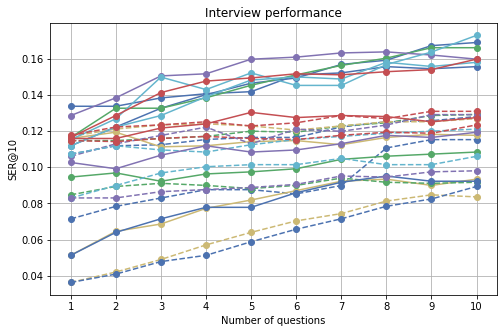

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))

def fmt(name):
    return name.replace('greedy-', '').upper()

for model in models:
    x = np.arange(1, n_questions + 1, 1)
    y = [np.mean(data[model][interview_length - 1]) for interview_length in x]
    
    is_rec = model.endswith('rec')
    
    color = model_color_map[model.replace('-rec', '')] if is_rec else model_color_map[model]
    linestyle = 'dashed' if is_rec else 'solid'
    
    plt.plot(x, y, label=fmt(model) if not is_rec else None, marker='o', linestyle=linestyle, color=color)

plt.ylabel(f'{metric.upper()}@{cutoff}')
plt.xlabel('Number of questions')
plt.xticks(x)
#plt.legend(loc='upper left')
plt.title('Interview performance')
plt.savefig('output/lineplot.pdf', bbox_inches='tight')
plt.grid(True)
plt.show()